## Team Algorithm Architect - Accident Prediction and Prevention

In [154]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [155]:
data=pd.read_csv('RTA_Dataset.csv')

Exploratory Data Analysis

In [149]:
data.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [157]:
data.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [152]:
data.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


# Data Preprocessing

In [153]:
import plotly.express as px
px.pie(data, data['Sex_of_driver'], data['Number_of_casualties'], template='ggplot2',hole=0.5)

In [159]:
px.pie(data,data['Cause_of_accident'],data['Number_of_casualties'],color='Cause_of_accident',template='ggplot2',hole=0.35)

In [160]:
px.histogram(data,data['Day_of_week'],data['Number_of_casualties'],color='Day_of_week',template='ggplot2')

In [161]:
px.histogram(data,data['Educational_level'],data['Number_of_casualties'],color='Educational_level',template='ggplot2')

In [162]:
px.histogram(data,data['Vehicle_driver_relation'],data['Number_of_casualties'],color='Vehicle_driver_relation',template='ggplot2')

<Axes: ylabel='Accident_severity'>

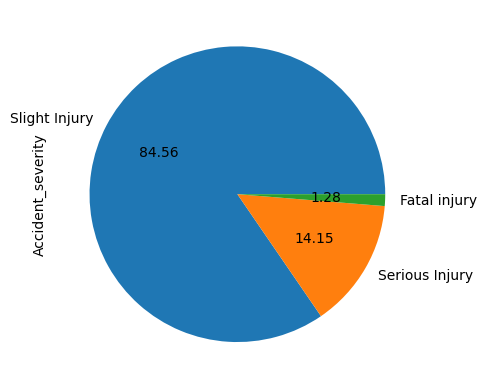

In [163]:
data['Accident_severity'].value_counts().plot(kind='pie',autopct='%.2f')

(array([8.397e+03, 2.290e+03, 9.090e+02, 0.000e+00, 3.940e+02, 2.070e+02,
        0.000e+00, 8.900e+01, 2.200e+01, 8.000e+00]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <BarContainer object of 10 artists>)

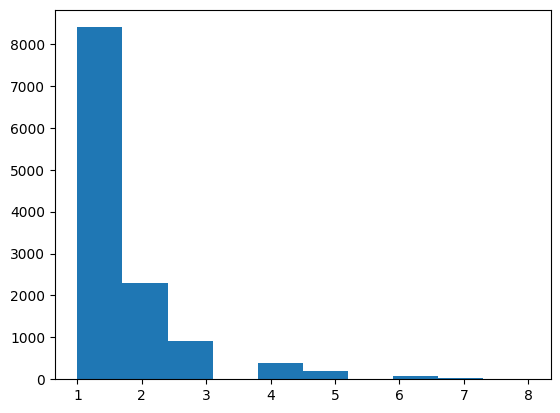

In [164]:
plt.hist(data['Number_of_casualties'])

In [167]:
pd.crosstab(data['Driving_experience'],data['Accident_severity'])

Accident_severity,Fatal injury,Serious Injury,Slight Injury
Driving_experience,,,
1-2yr,21,228,1507
2-5yr,46,381,2186
5-10yr,41,462,2860
Above 10yr,29,323,1910
Below 1yr,7,207,1128
No Licence,0,13,105
unknown,1,6,26


<Axes: xlabel='Accident_severity', ylabel='Driving_experience'>

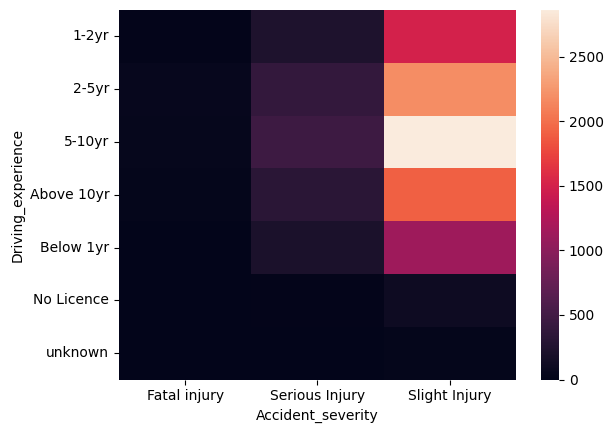

In [168]:
sns.heatmap(pd.crosstab(data['Driving_experience'],data['Accident_severity']))

# Feature Selection

In [169]:
columns_to_remove = ['Time','Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation',
                      'Service_year_of_vehicle', 'Defect_of_vehicle', 'Vehicle_movement', 'Casualty_class',
                      'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity', 'Work_of_casuality',
                      'Fitness_of_casuality', 'Driving_experience', 'Owner_of_vehicle', 'Number_of_vehicles_involved', 'Number_of_casualties', 'Cause_of_accident', 'Pedestrian_movement']

data = data.drop(columns=columns_to_remove)

In [170]:
d_or=data.copy()

In [171]:
data.isnull().sum()

Day_of_week                  0
Type_of_vehicle            950
Area_accident_occured      239
Lanes_or_Medians           385
Road_allignment            142
Types_of_Junction          887
Road_surface_type          172
Road_surface_conditions      0
Light_conditions             0
Weather_conditions           0
Type_of_collision          155
Accident_severity            0
dtype: int64

In [172]:
d_or.isnull().sum()

Day_of_week                  0
Type_of_vehicle            950
Area_accident_occured      239
Lanes_or_Medians           385
Road_allignment            142
Types_of_Junction          887
Road_surface_type          172
Road_surface_conditions      0
Light_conditions             0
Weather_conditions           0
Type_of_collision          155
Accident_severity            0
dtype: int64

# Handling Problems in Data Set

In [173]:
def fill_missing_with_random(column):
    non_missing_values = column.dropna()
    random_values = np.random.choice(non_missing_values, size=column.isnull().sum())
    column[column.isnull()] = random_values
    return column
data = data.apply(fill_missing_with_random, axis=0)
data


,Day_of_week,Type_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Accident_severity
0,Monday,Automobile,Residential areas,Two-way (divided with broken lines road marking),Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,Slight Injury
1,Monday,Public (> 45 seats),Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,Slight Injury
2,Monday,Lorry (41?100Q),Recreational areas,other,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,Serious Injury
3,Sunday,Public (> 45 seats),Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,Slight Injury
4,Sunday,Automobile,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Wednesday,Lorry (11?40Q),Outside rural areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,Slight Injury
12312,Sunday,Automobile,Outside rural areas,Two-way (divided with broken lines road marking),Escarpments,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,Slight Injury
12313,Sunday,Bajaj,Outside rural areas,Two-way (divided with broken lines road marking),Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,Serious Injury
12314,Sunday,Lorry (41?100Q),Office areas,Undivided Two way,Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,Slight Injury


In [174]:
data.isnull().sum()

Day_of_week                0
Type_of_vehicle            0
Area_accident_occured      0
Lanes_or_Medians           0
Road_allignment            0
Types_of_Junction          0
Road_surface_type          0
Road_surface_conditions    0
Light_conditions           0
Weather_conditions         0
Type_of_collision          0
Accident_severity          0
dtype: int64

In [176]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()

In [177]:
data = data.apply(l.fit_transform)

In [178]:
data

,Day_of_week,Type_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Accident_severity
0,1,0,9,2,5,1,0,0,3,2,3,2
1,1,11,6,4,5,1,0,0,3,2,8,2
2,1,5,1,6,5,1,0,0,3,2,2,1
3,3,11,6,6,6,7,2,0,0,2,8,2
4,3,0,4,6,5,7,0,0,0,2,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...
12311,6,4,5,4,5,1,0,0,3,2,8,2
12312,3,0,5,2,0,1,0,0,3,2,8,2
12313,3,1,5,2,7,1,0,0,3,2,8,1
12314,3,5,6,4,7,1,0,0,0,2,8,2


In [179]:
filtered_data = data[data['Accident_severity'] == 0]
filtered_data

,Day_of_week,Type_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Accident_severity
89,3,0,6,0,5,1,0,0,3,2,8,0
90,3,5,7,2,5,1,2,0,3,2,8,0
453,6,5,2,4,5,1,0,3,0,4,8,0
523,4,0,9,1,5,7,0,0,3,2,8,0
524,4,0,7,4,5,7,0,0,3,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
12262,5,5,4,4,6,7,0,0,0,2,6,0
12268,5,0,7,1,5,2,0,3,3,4,1,0
12269,5,5,1,2,5,1,0,3,3,4,8,0
12270,2,0,7,4,5,7,0,3,3,4,8,0


In [180]:
missing_rows = d_or[d_or.isnull().any(axis=1)].index.tolist()
data_or = data.drop(missing_rows)

In [181]:
data_or

,Day_of_week,Type_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Accident_severity
1,1,11,6,4,5,1,0,0,3,2,8,2
3,3,11,6,6,6,7,2,0,0,2,8,2
7,0,0,9,6,5,7,0,0,3,2,8,2
8,0,5,4,6,5,7,2,0,3,2,3,2
9,0,0,9,4,5,7,0,0,3,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
12311,6,4,5,4,5,1,0,0,3,2,8,2
12312,3,0,5,2,0,1,0,0,3,2,8,2
12313,3,1,5,2,7,1,0,0,3,2,8,1
12314,3,5,6,4,7,1,0,0,0,2,8,2


In [182]:
data

,Day_of_week,Type_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Accident_severity
0,1,0,9,2,5,1,0,0,3,2,3,2
1,1,11,6,4,5,1,0,0,3,2,8,2
2,1,5,1,6,5,1,0,0,3,2,2,1
3,3,11,6,6,6,7,2,0,0,2,8,2
4,3,0,4,6,5,7,0,0,0,2,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...
12311,6,4,5,4,5,1,0,0,3,2,8,2
12312,3,0,5,2,0,1,0,0,3,2,8,2
12313,3,1,5,2,7,1,0,0,3,2,8,1
12314,3,5,6,4,7,1,0,0,0,2,8,2


In [183]:
(data['Accident_severity'].value_counts()/len(data))*100

2    84.564794
1    14.152322
0     1.282884
Name: Accident_severity, dtype: float64

In [184]:
X_or = data_or.iloc[:,0:11]
Y_or = data_or.iloc[:,-1]

In [185]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X_or,Y_or,test_size=0.2)

In [186]:
acc=data

In [187]:
X = acc.iloc[:,0:11]
Y = acc.iloc[:,-1]

In [188]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [191]:
x = data.iloc[:,0:11]
y = data.iloc[:,-1]

In [192]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=15,stratify=y)

# Model Training using Random Forest Classifier

In [193]:
from sklearn.ensemble import RandomForestClassifier

In [194]:
from sklearn.metrics import accuracy_score

In [195]:
rf = RandomForestClassifier()

In [196]:
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
accuracy_score(y_test,y_pred)

0.9431909105456873

In [197]:
y_pred

array([2, 0, 1, ..., 1, 1, 1])

In [198]:
df = pd.DataFrame(y_pred)

In [199]:
df[0].value_counts()

1    2292
0    2125
2    1832
Name: 0, dtype: int64

In [200]:
(df[0].value_counts()/len(df))*100

1    36.677868
0    34.005441
2    29.316691
Name: 0, dtype: float64

# Performance of the Model

In [201]:
print('-----------------------------------------------------------------------------------------------------------------------')
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score

print('confusion matrix:',confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('accuracy:',round(accuracy_score(y_test,y_pred),2))
print('precision:',round(precision_score(y_test,y_pred,average='weighted'),2))
print('recall:',round(recall_score(y_test,y_pred,average='weighted'),2))
print('f1 score:',round(f1_score(y_test,y_pred,average='weighted'),2))
print()

-----------------------------------------------------------------------------------------------------------------------
confusion matrix: [[2083    0    0]
 [  18 2022   43]
 [  24  270 1789]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2083
           1       0.88      0.97      0.92      2083
           2       0.98      0.86      0.91      2083

    accuracy                           0.94      6249
   macro avg       0.95      0.94      0.94      6249
weighted avg       0.95      0.94      0.94      6249

accuracy: 0.94
precision: 0.95
recall: 0.94
f1 score: 0.94



In [202]:
rf.fit(x_train,y_train)
y_pred2 = rf.predict(x)
accuracy_score(y,y_pred2)

0.9676108177308369